In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(18, 15)

In [3]:
data = pd.read_csv('Dataset (5).csv')
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
data.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [5]:
data.drop('Loan_ID', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  object 
 1   Length_Employed          156938 non-null  object 
 2   Home_Owner               138960 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 16.3+ MB


In [7]:
# Removing special sequences
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].str.replace(r'\D', '', regex=True)

In [8]:
# Coverting feature which is read in incorrect format to correct format, i.e from object to integer
data['Loan_Amount_Requested'] = pd.to_numeric(data['Loan_Amount_Requested'], downcast='integer')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  int32  
 1   Length_Employed          156938 non-null  object 
 2   Home_Owner               138960 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 

In [10]:
data['Income_Verified'] = data['Income_Verified'].replace(to_replace=['VERIFIED - income', 'VERIFIED - income source'], value='verified')

In [11]:
data.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [12]:
for i in data.select_dtypes(include='O'):
    data[i] = data[i].fillna(data[i].mode()[0])

In [13]:
for i in data.select_dtypes(include='number'):
    data[i] = data[i].fillna(data[i].mean())

## Safe customers

In [14]:
safe_cust  = data[(data['Debt_To_Income']<=20)&(data['Inquiries_Last_6Mo']<=1)&(data['Income_Verified']=='verified')&((data['Length_Employed']=='10+ years')|(data['Length_Employed']=='8 years')|(data['Length_Employed']=='9 years'))&(data['Months_Since_Deliquency']<=30)&((data['Home_Owner']=='Own')|(data['Home_Owner']=='Rent'))]

In [15]:
safe_cust

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
45,8000,10+ years,Rent,60000.000000,verified,debt_consolidation,10.30,0,21.0,5,15,Male,2
76,6000,9 years,Rent,106000.000000,verified,credit_card,17.15,0,12.0,8,32,Male,3
163,23275,10+ years,Rent,66000.000000,verified,home_improvement,17.05,0,11.0,6,10,Male,2
165,6000,10+ years,Rent,148000.000000,verified,debt_consolidation,19.22,1,29.0,10,29,Male,2
263,6600,10+ years,Own,67964.000000,verified,major_purchase,10.93,0,30.0,13,18,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163796,13500,10+ years,Rent,86000.000000,verified,credit_card,17.79,0,21.0,7,18,Male,1
163907,3500,10+ years,Rent,74000.000000,verified,debt_consolidation,7.56,1,15.0,8,19,Male,2
163996,8400,8 years,Own,73331.159434,verified,credit_card,14.14,1,26.0,13,25,Male,1
164005,24500,10+ years,Rent,120000.000000,verified,credit_card,17.25,1,17.0,10,34,Male,2


In [16]:
safe_cust.Interest_Rate.value_counts()

2    893
3    827
1    238
Name: Interest_Rate, dtype: int64

In [17]:
safe_cust['Interest_Rate'] = safe_cust['Interest_Rate'].replace(to_replace=[2, 3], value=1)

In [18]:
safe_cust

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
45,8000,10+ years,Rent,60000.000000,verified,debt_consolidation,10.30,0,21.0,5,15,Male,1
76,6000,9 years,Rent,106000.000000,verified,credit_card,17.15,0,12.0,8,32,Male,1
163,23275,10+ years,Rent,66000.000000,verified,home_improvement,17.05,0,11.0,6,10,Male,1
165,6000,10+ years,Rent,148000.000000,verified,debt_consolidation,19.22,1,29.0,10,29,Male,1
263,6600,10+ years,Own,67964.000000,verified,major_purchase,10.93,0,30.0,13,18,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163796,13500,10+ years,Rent,86000.000000,verified,credit_card,17.79,0,21.0,7,18,Male,1
163907,3500,10+ years,Rent,74000.000000,verified,debt_consolidation,7.56,1,15.0,8,19,Male,1
163996,8400,8 years,Own,73331.159434,verified,credit_card,14.14,1,26.0,13,25,Male,1
164005,24500,10+ years,Rent,120000.000000,verified,credit_card,17.25,1,17.0,10,34,Male,1


In [19]:
safe_cust.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
45,8000,10+ years,Rent,60000.0,verified,debt_consolidation,10.30,0,21.0,5,15,Male,1
76,6000,9 years,Rent,106000.0,verified,credit_card,17.15,0,12.0,8,32,Male,1
163,23275,10+ years,Rent,66000.0,verified,home_improvement,17.05,0,11.0,6,10,Male,1
165,6000,10+ years,Rent,148000.0,verified,debt_consolidation,19.22,1,29.0,10,29,Male,1
263,6600,10+ years,Own,67964.0,verified,major_purchase,10.93,0,30.0,13,18,Male,1


In [20]:
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9,0.95, 0.99]).round(2)

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00
mean,14349.34,73331.16,17.21,0.78,34.23,11.19,25.07,2.16
std,8281.87,55574.39,7.85,1.03,14.79,4.99,11.58,0.74
min,500.00,4000.00,0.00,0.00,0.00,0.00,2.00,1.00
1%,1800.00,20000.00,1.67,0.00,3.00,3.00,6.00,1.00
5%,3500.00,29643.40,4.84,0.00,8.00,5.00,9.00,1.00
10%,5000.00,35000.00,7.04,0.00,14.00,6.00,12.00,1.00
25%,8000.00,48600.00,11.37,0.00,34.00,8.00,17.00,2.00
50%,12075.00,70000.00,16.84,0.00,34.23,10.00,23.00,2.00
75%,20000.00,82000.00,22.78,1.00,34.23,14.00,32.00,3.00


## High risk customers

In [21]:
high_risk  = data[(data['Debt_To_Income']>=30)&(data['Inquiries_Last_6Mo']>=4)&(data['Home_Owner']!='Own')&(data['Months_Since_Deliquency']>30)]

In [22]:
high_risk

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
924,24550,10+ years,Mortgage,65000.000000,verified,debt_consolidation,32.31,4,34.229356,35,62,Male,3
925,10225,7 years,Mortgage,39000.000000,verified,debt_consolidation,33.23,6,34.229356,15,27,Male,3
2382,8000,10+ years,Rent,42000.000000,verified,credit_card,31.54,6,34.229356,14,44,Female,2
3570,29875,1 year,Mortgage,73000.000000,verified,debt_consolidation,32.38,5,34.229356,12,36,Male,3
8646,28775,10+ years,Mortgage,86000.000000,verified,debt_consolidation,30.48,5,34.229356,16,32,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157878,21000,6 years,Mortgage,83000.000000,verified,debt_consolidation,30.16,4,63.000000,23,41,Male,3
159130,18250,10+ years,Mortgage,73331.159434,verified,debt_consolidation,33.43,4,34.229356,19,27,Female,3
161788,19075,5 years,Mortgage,73331.159434,verified,debt_consolidation,32.00,5,76.000000,13,51,Male,3
163237,3200,8 years,Rent,42000.000000,not verified,debt_consolidation,33.97,4,34.229356,14,29,Male,2


In [23]:
high_risk.shape

(155, 13)

In [66]:
high_risk.Loan_Amount_Requested.describe()

count      155.000000
mean     15564.354839
std       8213.266286
min       2200.000000
25%       9000.000000
50%      15000.000000
75%      20050.000000
max      35000.000000
Name: Loan_Amount_Requested, dtype: float64

In [24]:
high_risk['Interest_Rate'] = high_risk['Interest_Rate'].replace(to_replace=[1, 2], value=3)

In [25]:
high_risk.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
924,24550,10+ years,Mortgage,65000.0,verified,debt_consolidation,32.31,4,34.229356,35,62,Male,3
925,10225,7 years,Mortgage,39000.0,verified,debt_consolidation,33.23,6,34.229356,15,27,Male,3
2382,8000,10+ years,Rent,42000.0,verified,credit_card,31.54,6,34.229356,14,44,Female,3
3570,29875,1 year,Mortgage,73000.0,verified,debt_consolidation,32.38,5,34.229356,12,36,Male,3
8646,28775,10+ years,Mortgage,86000.0,verified,debt_consolidation,30.48,5,34.229356,16,32,Male,3


In [26]:
sample_data = pd.concat([safe_cust, high_risk], axis=0)

In [27]:
sample_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
45,8000,10+ years,Rent,60000.0,verified,debt_consolidation,10.30,0,21.0,5,15,Male,1
76,6000,9 years,Rent,106000.0,verified,credit_card,17.15,0,12.0,8,32,Male,1
163,23275,10+ years,Rent,66000.0,verified,home_improvement,17.05,0,11.0,6,10,Male,1
165,6000,10+ years,Rent,148000.0,verified,debt_consolidation,19.22,1,29.0,10,29,Male,1
263,6600,10+ years,Own,67964.0,verified,major_purchase,10.93,0,30.0,13,18,Male,1


In [28]:
sample_data.shape

(2113, 13)

In [29]:
# Dummy trap to create dummy variables for remaining categorical features
hm = pd.get_dummies(sample_data['Home_Owner'], drop_first=True)
pl = pd.get_dummies(sample_data['Purpose_Of_Loan'], drop_first=True)
iv = pd.get_dummies(sample_data['Income_Verified'], drop_first=True)
g = pd.get_dummies(sample_data['Gender'], drop_first=True)
p = pd.get_dummies(sample_data['Length_Employed'], drop_first=True)

In [30]:
# Concatenate dummy varaibles to the data 
sample_data = pd.concat([sample_data, hm, pl, iv, g, p], axis=1)
sample_data.drop(labels=['Home_Owner', 'Purpose_Of_Loan', 'Income_Verified', 'Gender', 'Length_Employed'], axis=1, inplace=True)

In [31]:
pd.set_option('display.max_columns', None)
sample_data.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Own,Rent,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,verified,Male,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
45,8000,60000.0,10.30,0,21.0,5,15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
76,6000,106000.0,17.15,0,12.0,8,32,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
163,23275,66000.0,17.05,0,11.0,6,10,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
165,6000,148000.0,19.22,1,29.0,10,29,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
263,6600,67964.0,10.93,0,30.0,13,18,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [32]:
X = sample_data.drop('Interest_Rate', axis=1)
y=sample_data['Interest_Rate']

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
from sklearn.metrics import accuracy_score, classification_report

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
def compare_model_train_test(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n',)

In [37]:
compare_model_train_test(clf)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1940
           3       1.00      1.00      1.00       151

    accuracy                           1.00      2091
   macro avg       1.00      1.00      1.00      2091
weighted avg       1.00      1.00      1.00      2091
 
 Testing accuracy is : 1.0 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22
 



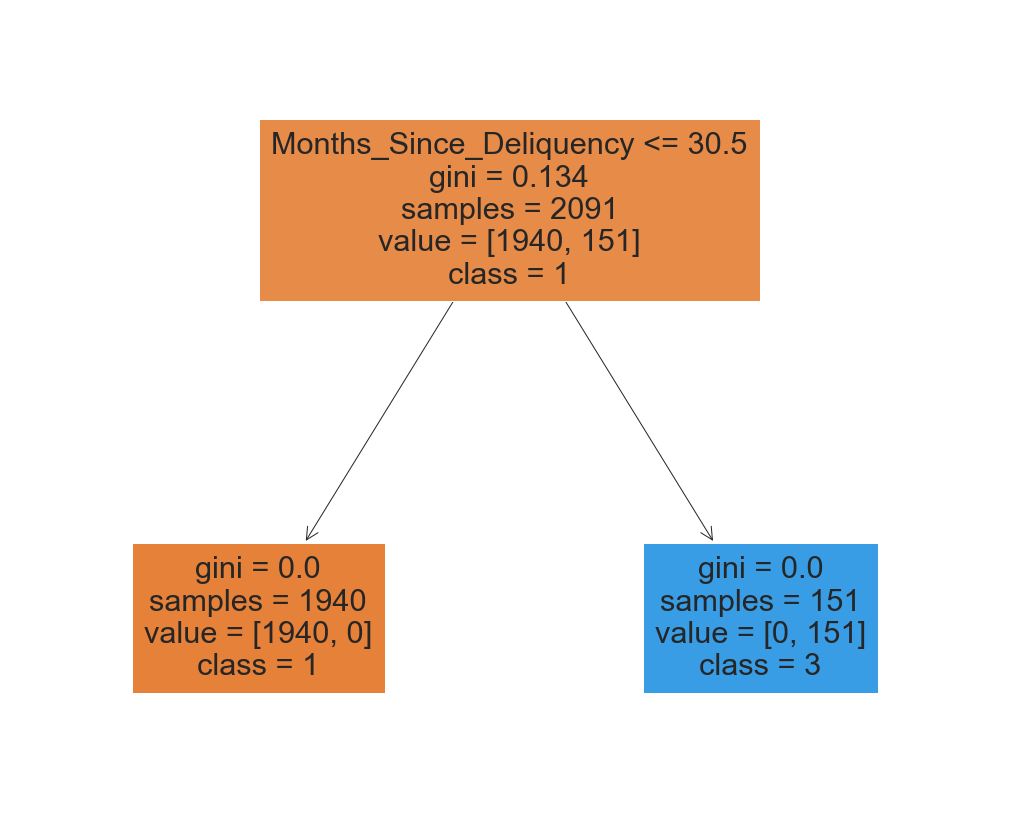

In [54]:
from sklearn import tree
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['1', '3'])
plt.show()

In [55]:
interest_rate_1 = data[data['Interest_Rate']==1]
interest_rate_2 = data[data['Interest_Rate']==2]
interest_rate_3 = data[data['Interest_Rate']==3]

In [56]:
print(interest_rate_1.shape)
print(interest_rate_2.shape)
print(interest_rate_3.shape)

(33806, 13)
(70580, 13)
(59923, 13)


In [57]:
interest_rate_1.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,34.229356,9,14,Female,1
4,17000,8 years,Own,96000.0,verified,debt_consolidation,22.17,1,34.229356,19,30,Female,1
9,30000,10+ years,Own,163000.0,verified,debt_consolidation,11.13,0,34.229356,24,43,Male,1
20,4000,10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.000000,15,21,Female,1
25,2200,7 years,Mortgage,82000.0,not verified,major_purchase,5.02,1,34.229356,14,21,Female,1


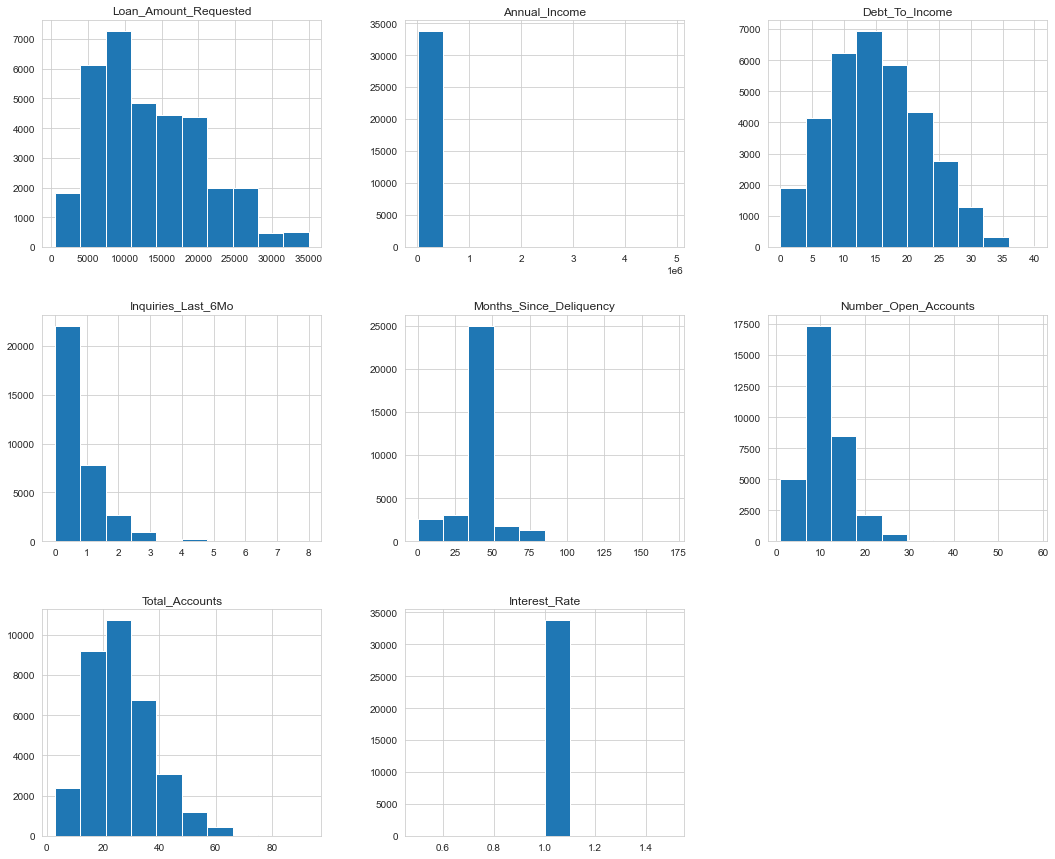

In [58]:
interest_rate_1.hist()
plt.show()

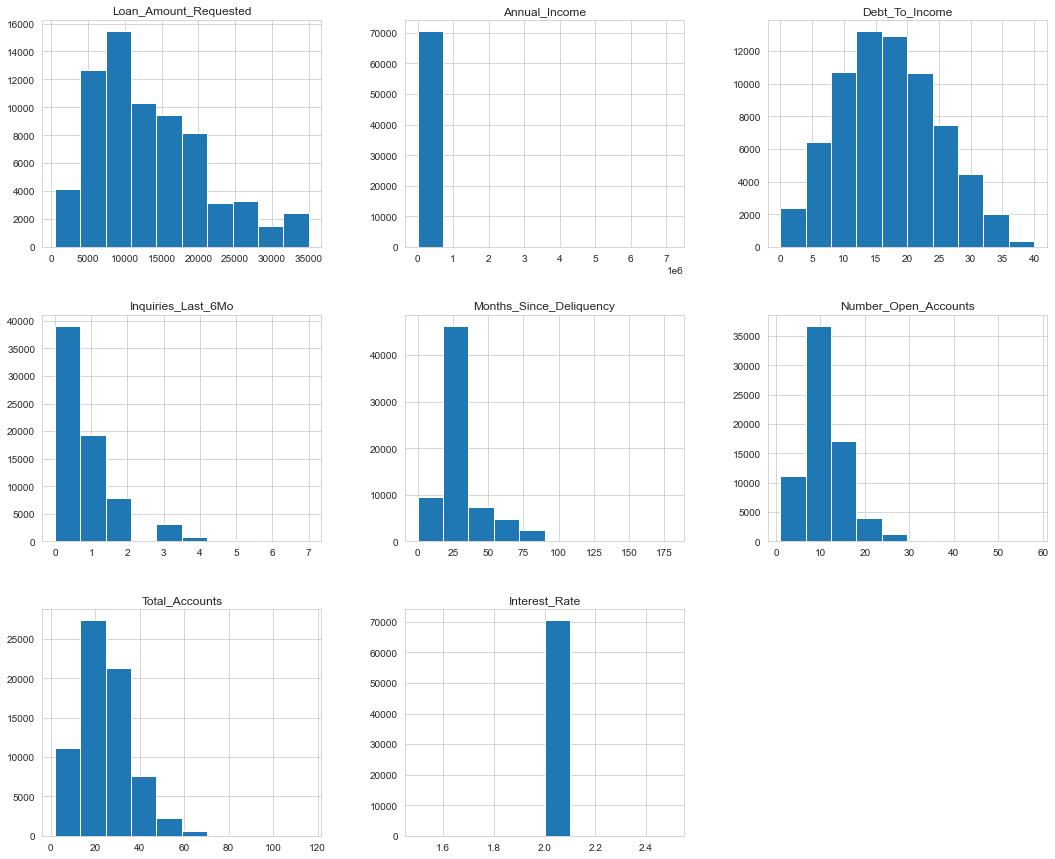

In [59]:
interest_rate_2.hist()
plt.show()

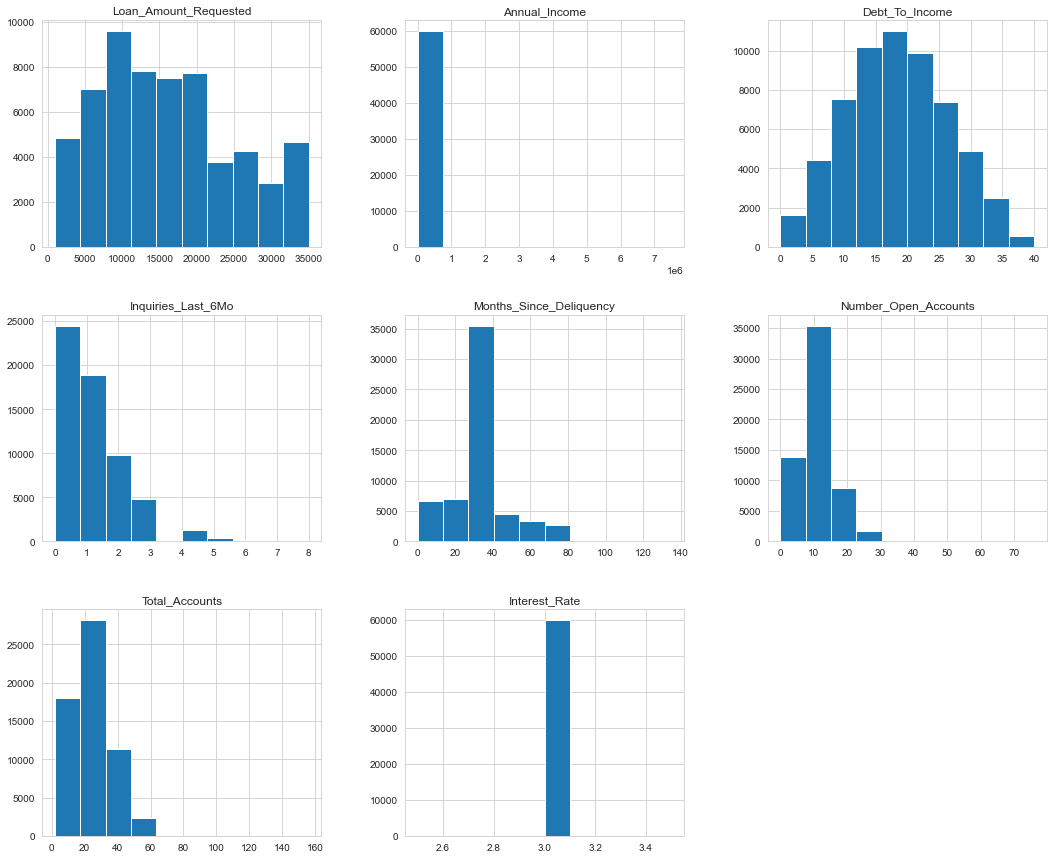

In [60]:
interest_rate_3.hist()
plt.show()

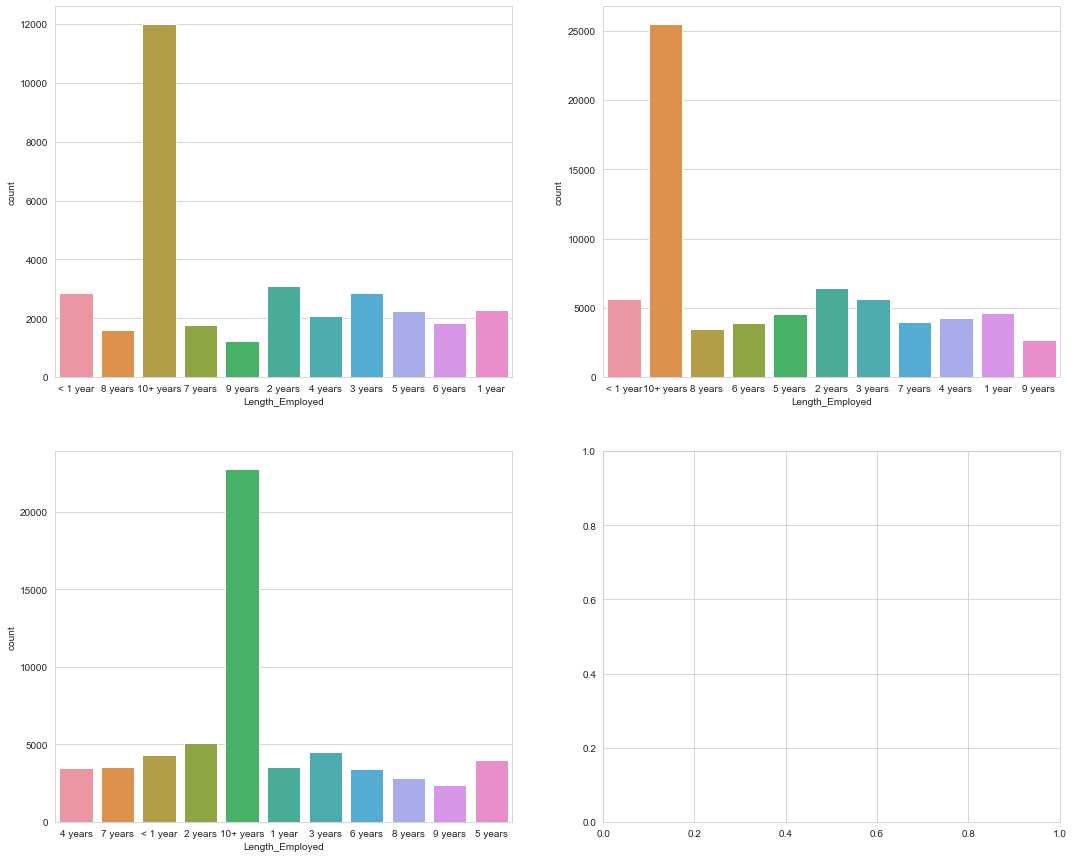

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.countplot(interest_rate_1['Length_Employed'], ax=ax[0][0])
sns.countplot(interest_rate_2['Length_Employed'], ax=ax[0][1])
sns.countplot(interest_rate_3['Length_Employed'], ax=ax[1][0])
plt.show()

In [62]:
print(interest_rate_1.Length_Employed.value_counts(normalize=True))
print(interest_rate_2.Length_Employed.value_counts(normalize=True))
print(interest_rate_3.Length_Employed.value_counts(normalize=True))

10+ years    0.355114
2 years      0.091788
< 1 year     0.084748
3 years      0.084097
1 year       0.067000
5 years      0.066497
4 years      0.060906
6 years      0.054103
7 years      0.052358
8 years      0.047240
9 years      0.036147
Name: Length_Employed, dtype: float64
10+ years    0.361306
2 years      0.091017
3 years      0.079612
< 1 year     0.079527
1 year       0.065174
5 years      0.064409
4 years      0.060640
7 years      0.056461
6 years      0.054803
8 years      0.049136
9 years      0.037914
Name: Length_Employed, dtype: float64
10+ years    0.380155
2 years      0.084992
3 years      0.075297
< 1 year     0.072209
5 years      0.067086
1 year       0.059360
7 years      0.059293
4 years      0.057490
6 years      0.056689
8 years      0.047594
9 years      0.039834
Name: Length_Employed, dtype: float64


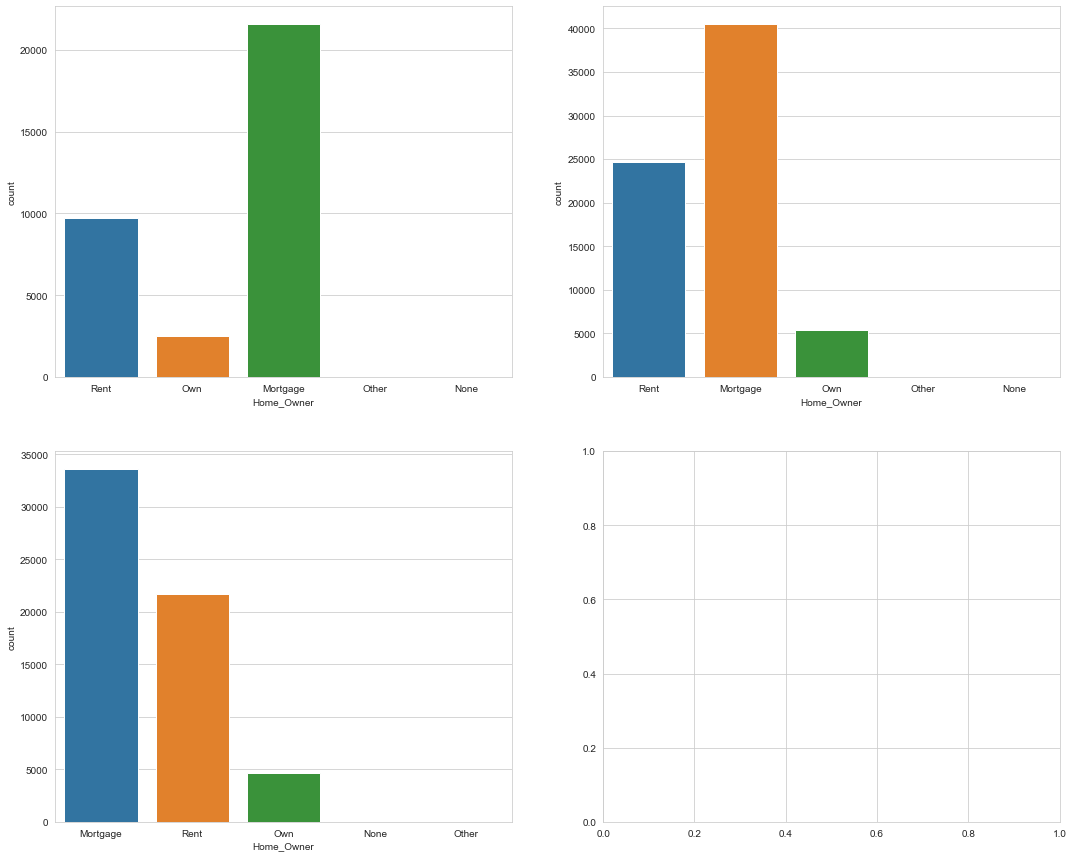

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.countplot(interest_rate_1['Home_Owner'], ax=ax[0][0])
sns.countplot(interest_rate_2['Home_Owner'], ax=ax[0][1])
sns.countplot(interest_rate_3['Home_Owner'], ax=ax[1][0],)
plt.show()

In [64]:
print(interest_rate_1.Home_Owner.value_counts(normalize=True))
print(interest_rate_2.Home_Owner.value_counts(normalize=True))
print(interest_rate_3.Home_Owner.value_counts(normalize=True))

Mortgage    0.638467
Rent        0.287493
Own         0.073596
Other       0.000296
None        0.000148
Name: Home_Owner, dtype: float64
Mortgage    0.573831
Rent        0.349065
Own         0.076736
Other       0.000354
None        0.000014
Name: Home_Owner, dtype: float64
Mortgage    0.560870
Rent        0.361714
Own         0.077116
Other       0.000234
None        0.000067
Name: Home_Owner, dtype: float64


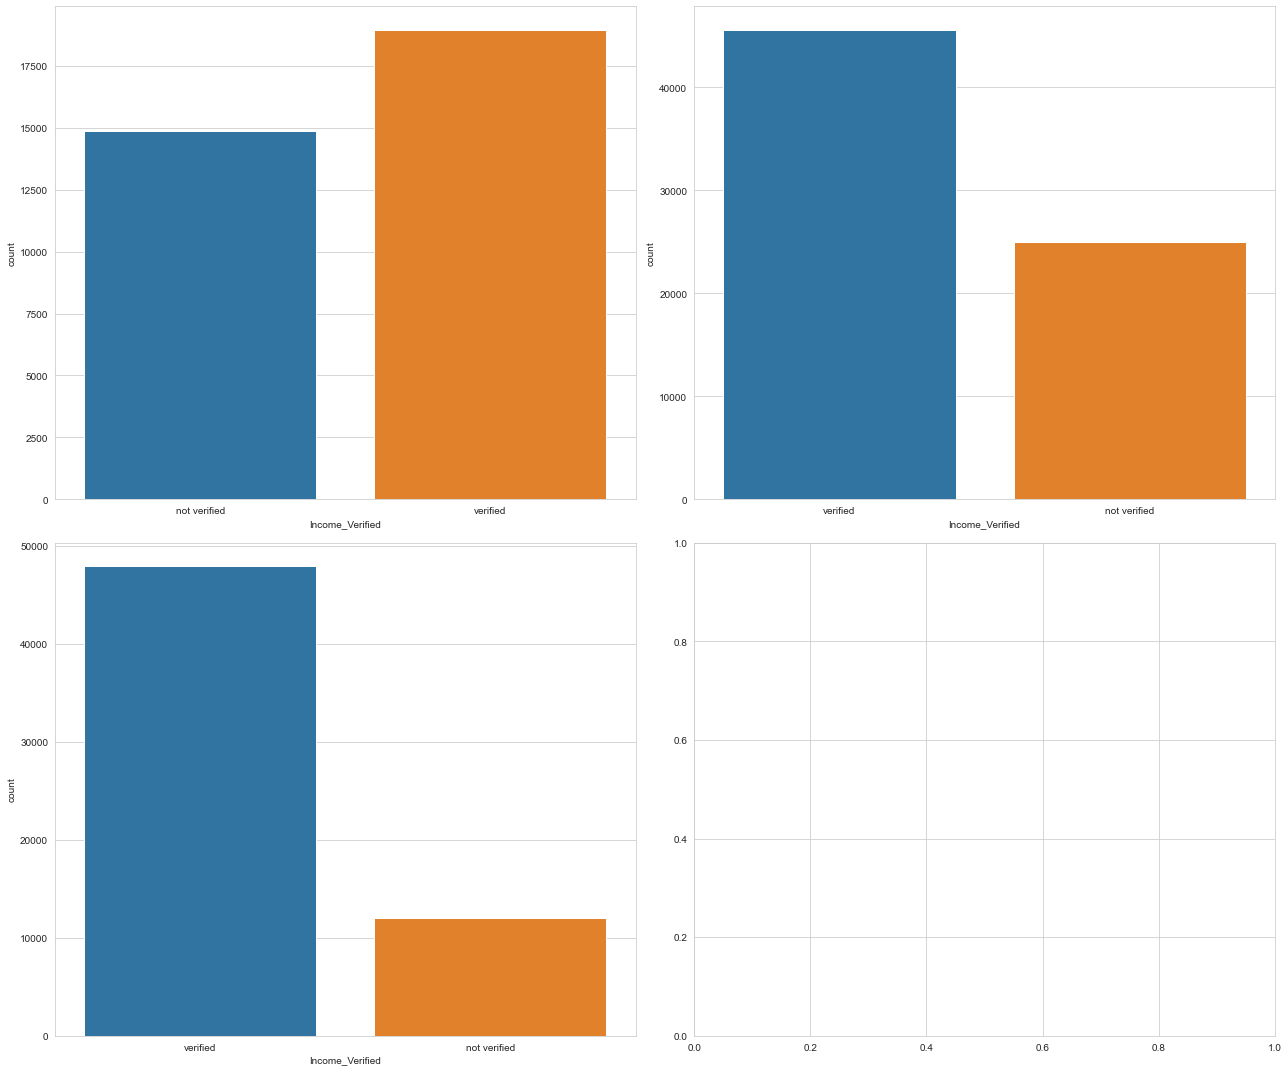

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.countplot(interest_rate_1['Income_Verified'], ax=ax[0][0])
sns.countplot(interest_rate_2['Income_Verified'], ax=ax[0][1])
sns.countplot(interest_rate_3['Income_Verified'], ax=ax[1][0])
plt.tight_layout()
plt.show()

In [50]:
print(interest_rate_1.Income_Verified.value_counts(normalize=True))
print(interest_rate_2.Income_Verified.value_counts(normalize=True))
print(interest_rate_3.Income_Verified.value_counts(normalize=True))

verified        0.560256
not verified    0.439744
Name: Income_Verified, dtype: float64
verified        0.645835
not verified    0.354165
Name: Income_Verified, dtype: float64
verified        0.799576
not verified    0.200424
Name: Income_Verified, dtype: float64


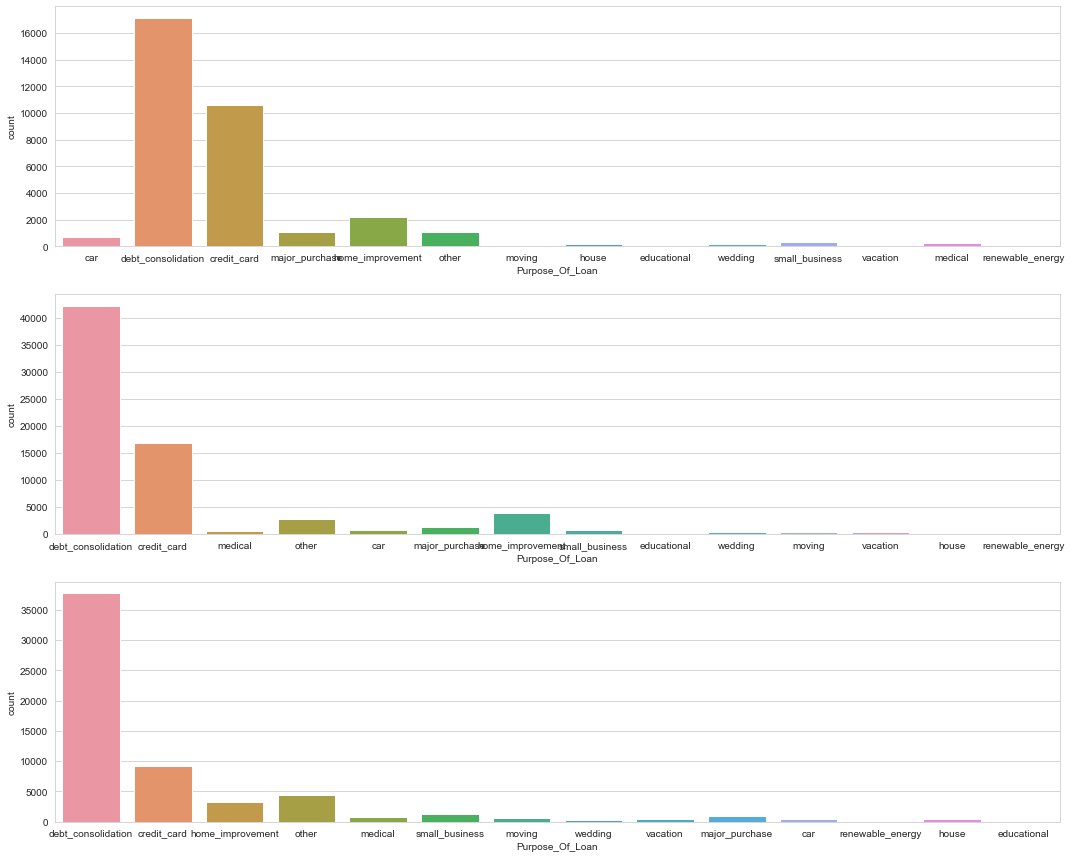

In [51]:
fig, ax = plt.subplots(nrows=3, ncols=1)
sns.countplot(interest_rate_1['Purpose_Of_Loan'], ax=ax[0])
sns.countplot(interest_rate_2['Purpose_Of_Loan'], ax=ax[1])
sns.countplot(interest_rate_3['Purpose_Of_Loan'], ax=ax[2])
plt.show()

In [52]:
print(interest_rate_1.Purpose_Of_Loan.value_counts(normalize=True))
print(interest_rate_2.Purpose_Of_Loan.value_counts(normalize=True))
print(interest_rate_3.Purpose_Of_Loan.value_counts(normalize=True))

debt_consolidation    0.506685
credit_card           0.312430
home_improvement      0.064633
major_purchase        0.031207
other                 0.030823
car                   0.019553
small_business        0.009466
medical               0.006567
wedding               0.005472
house                 0.004053
vacation              0.003757
moving                0.003579
educational           0.001094
renewable_energy      0.000680
Name: Purpose_Of_Loan, dtype: float64
debt_consolidation    0.599405
credit_card           0.239360
home_improvement      0.054803
other                 0.040266
major_purchase        0.019510
car                   0.011150
small_business        0.010187
medical               0.007963
wedding               0.004123
moving                0.004123
vacation              0.004080
house                 0.003415
educational           0.001105
renewable_energy      0.000510
Name: Purpose_Of_Loan, dtype: float64
debt_consolidation    0.628573
credit_card           0.1

Interest rate -1
--
    Average loan amount - 13,351
    Duration - 10+years
    Home owner - Mortgage
    Annual income - 80000
    Purpose of loan - Debt consolidation
    Debt to income - 15
    Inquiries - 0
    Days since deliquency - 36
    Number of open accounts - 11
    Total accounts - 26
    Gender - Male
    Income verification - verified
Interest rate - 2
--
    Average loan amount - 13,419
    Duration - 10+years
    Home owner - Mortgage
    Annual income - 70000
    Purpose of loan - Debt consolidation
    Debt to income - 17
    Inquiries - 0.7
    Days since deliquency - 34
    Number of open accounts - 11
    Total accounts - 24
    Gender - Male
    Income verification - verified
Interest rate -3
--
    Average loan amount - 16,007
    Duration - 10+years
    Home owner - Mortgage
    Annual income - 70000
    Purpose of loan - Debt consolidation
    Debt to income - 18
    Inquiries - 1
    Days since deliquency - 33
    Number of open accounts - 11
    Total accounts - 24
    Gender - Male
    Income verification - verified